## Telco Customer Churn 

### Step 1: Data Collection and Loading 

In [11]:
# data_collection.py
import pandas as pd

# Load the dataset
data_path = "WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(data_path)

# Display the first few rows of the dataset
df.head()


customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

### Step 2: Data Cleaning and Preprocessing

In [13]:
# data_cleaning_preprocessing.py
import pandas as pd

# Load the dataset
data_path = "WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(data_path)

# Handle missing values in TotalCharges
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)

# Convert categorical columns to numerical
df = pd.get_dummies(df, drop_first=True)

# Display the cleaned dataset
print(df.head())


   SeniorCitizen  tenure  MonthlyCharges  TotalCharges  customerID_0003-MKNFE  \
0              0       1           29.85         29.85                  False   
1              0      34           56.95       1889.50                  False   
2              0       2           53.85        108.15                  False   
3              0      45           42.30       1840.75                  False   
4              0       2           70.70        151.65                  False   

   customerID_0004-TLHLJ  customerID_0011-IGKFF  customerID_0013-EXCHZ  \
0                  False                  False                  False   
1                  False                  False                  False   
2                  False                  False                  False   
3                  False                  False                  False   
4                  False                  False                  False   

   customerID_0013-MHZWF  customerID_0013-SMEOE  ...  StreamingTV_Ye

### Step 3: Exploratory Data Analysis (EDA)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


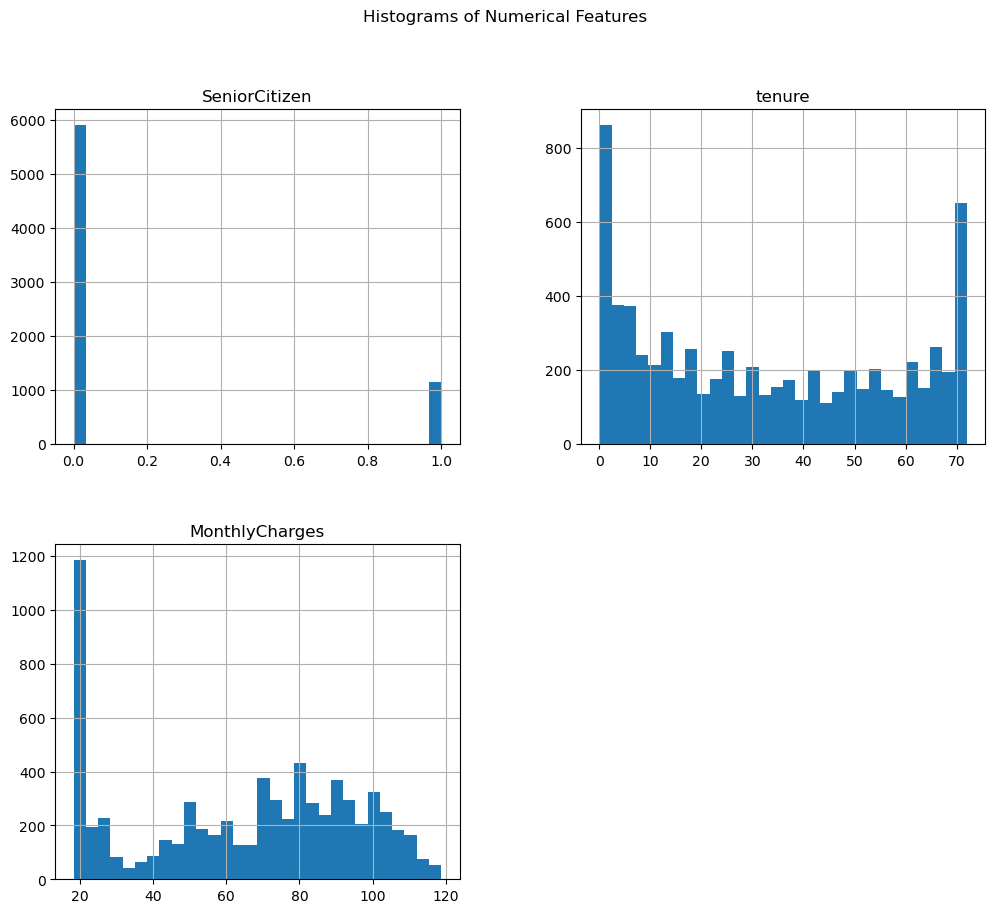

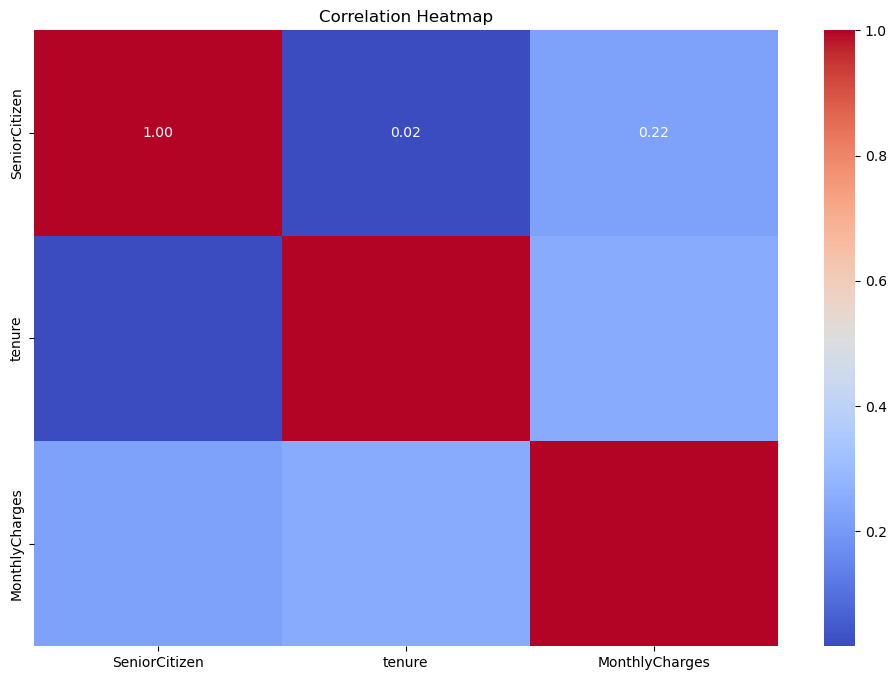

In [19]:
# exploratory_data_analysis.py
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the cleaned dataset
data_path = "WA_Fn-UseC_-Telco-Customer-Churn.csv"  
df = pd.read_csv(data_path)

# Display basic statistics and info
print(df.info())
print(df.describe())

# Histograms of numerical features
df.hist(figsize=(12, 10), bins=30)
plt.suptitle('Histograms of Numerical Features')
plt.show()

# Correlation heatmap (only for numeric columns)
numeric_df = df.select_dtypes(include=[float, int])  # Select only numeric columns
correlation = numeric_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


### Step 4: Model Selection and Training

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load the dataset
data_path = "WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(data_path)

# Handle missing values in TotalCharges (assuming numeric)
try:
  df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])
except:
  # Handle non-numeric values (e.g., impute or remove rows)
  pass  # You can replace 'pass' with your desired handling

# Drop unnecessary columns
df.drop(['customerID'], axis=1, inplace=True)

# Encoding categorical variables
df = pd.get_dummies(df, drop_first=True)

# Define features and target
X = df.drop('Churn_Yes', axis=1)
y = df['Churn_Yes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))


Confusion Matrix:
 [[959  77]
 [205 168]]
Classification Report:
               precision    recall  f1-score   support

       False       0.82      0.93      0.87      1036
        True       0.69      0.45      0.54       373

    accuracy                           0.80      1409
   macro avg       0.75      0.69      0.71      1409
weighted avg       0.79      0.80      0.78      1409

Accuracy Score: 0.7998580553584103


### Step 5: Clustering and Dimensionality Reduction

C:\Users\Adeitan Richard\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


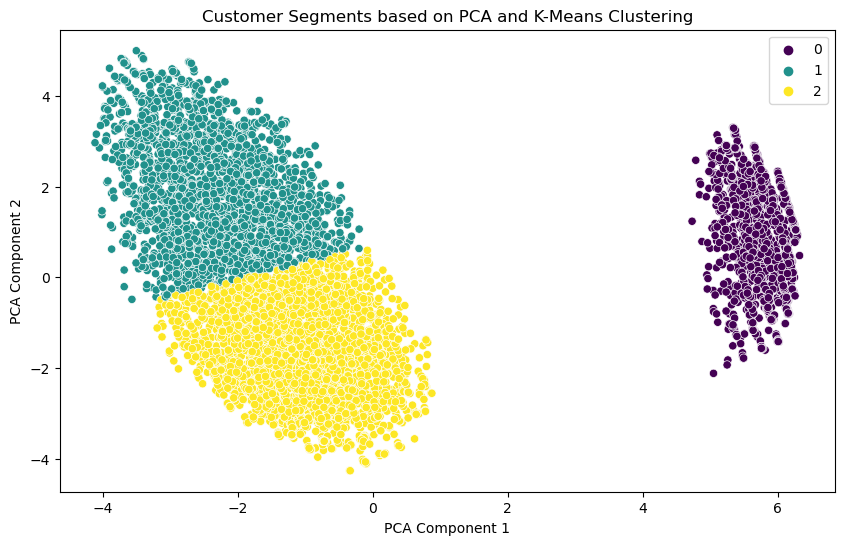

In [37]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data_path = "WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(data_path)

# Handle missing values in TotalCharges
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.fillna(df.select_dtypes(include='number').mean(), inplace=True)

# Drop unnecessary columns
df.drop(['customerID'], axis=1, inplace=True)

# Encoding categorical variables
df = pd.get_dummies(df, drop_first=True)

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Dimensionality Reduction using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Clustering using K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_pca)

# Add clusters to the original dataframe
df['Cluster'] = clusters

# Plotting the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='viridis')
plt.title('Customer Segments based on PCA and K-Means Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

- The scatter plot above illustrates the results of clustering the Telco customer churn dataset using K-Means algorithm, after reducing the dataset's dimensionality with Principal Component Analysis (PCA). Each point represents a customer, and the plot shows how customers are grouped into three distinct clusters based on their features. The x-axis and y-axis correspond to the first and second principal components, respectively, which capture the most significant variance in the data.

- The different colors indicate the cluster membership, with each color representing a unique cluster. The clustering helps to segment customers into groups with similar characteristics. For instance, customers in the same cluster might share common traits in terms of service usage, tenure, or payment behavior. Understanding these clusters can provide valuable insights for targeted marketing strategies, customer retention efforts, and personalized service offerings. By analyzing the specific features within each cluster, we can identify patterns and trends that distinguish one group from another, allowing for more informed decision-making and strategic planning.

### Step 6: Results Interpretation and Business Impact

In [31]:
# results_interpretation.py
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Feature Importance
importances = model.feature_importances_
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Business Impact
# Interpretation of how the features impact customer churn
important_features = feature_importance_df.head(10)['Feature'].tolist()
print("Top 10 Important Features:\n", important_features)

# Recommendations
print("Business Recommendations based on feature importance:")
for feature in important_features:
    print(f"- Focus on improving {feature} to reduce customer churn.")


Top 10 Important Features:
 ['tenure', 'MonthlyCharges', 'PaymentMethod_Electronic check', 'InternetService_Fiber optic', 'OnlineSecurity_Yes', 'Contract_Two year', 'TechSupport_Yes', 'PaperlessBilling_Yes', 'Contract_One year', 'gender_Male']
Business Recommendations based on feature importance:
- Focus on improving tenure to reduce customer churn.
- Focus on improving MonthlyCharges to reduce customer churn.
- Focus on improving PaymentMethod_Electronic check to reduce customer churn.
- Focus on improving InternetService_Fiber optic to reduce customer churn.
- Focus on improving OnlineSecurity_Yes to reduce customer churn.
- Focus on improving Contract_Two year to reduce customer churn.
- Focus on improving TechSupport_Yes to reduce customer churn.
- Focus on improving PaperlessBilling_Yes to reduce customer churn.
- Focus on improving Contract_One year to reduce customer churn.
- Focus on improving gender_Male to reduce customer churn.


### Step 7: Future Recommendations

In [32]:
# future_recommendations.py
print("Future Recommendations:")
print("- Explore other machine learning models such as Gradient Boosting, XGBoost, or Neural Networks for potential performance improvements.")
print("- Conduct feature engineering to create new features that could improve model accuracy.")
print("- Implement a more comprehensive hyperparameter tuning process to optimize model performance.")
print("- Use clustering to segment customers and tailor marketing strategies to each segment.")
print("- Consider using more advanced techniques like ensemble methods or stacking models for better predictions.")


Future Recommendations:
- Explore other machine learning models such as Gradient Boosting, XGBoost, or Neural Networks for potential performance improvements.
- Conduct feature engineering to create new features that could improve model accuracy.
- Implement a more comprehensive hyperparameter tuning process to optimize model performance.
- Use clustering to segment customers and tailor marketing strategies to each segment.
- Consider using more advanced techniques like ensemble methods or stacking models for better predictions.


## Presentation and Findings visualizations

C:\Users\Adeitan Richard\AppData\Local\Temp\ipykernel_4280\699064004.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate_by_monthly_charge = df.groupby('MonthlyChargesBracket')['Churn'].value_counts(normalize=True).unstack().fillna(0)['Yes']


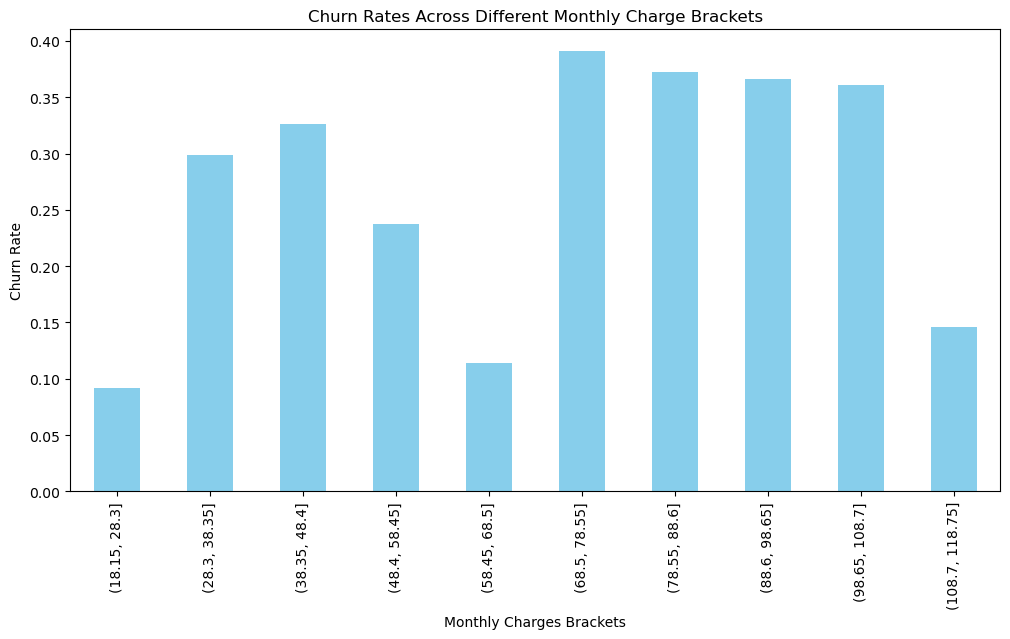

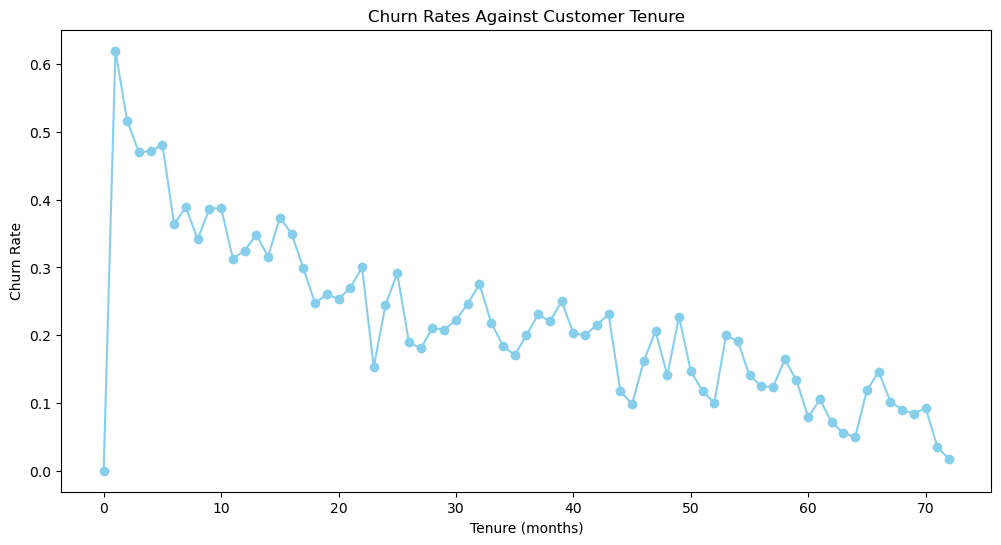

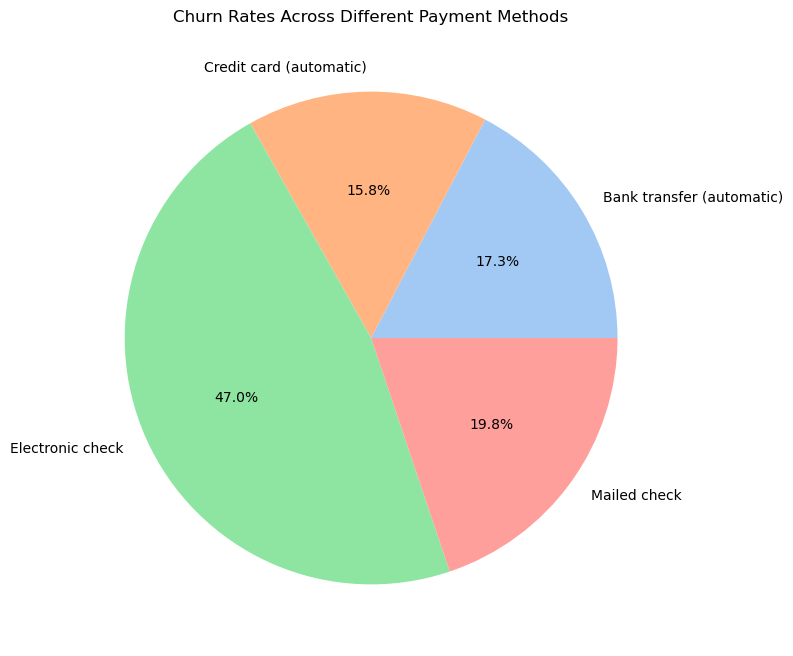

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data_path = "WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(data_path)

# Handle missing values in TotalCharges
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Create Monthly Charge Brackets
df['MonthlyChargesBracket'] = pd.cut(df['MonthlyCharges'], bins=10)

# 1. Histogram/Bar Chart: Distribution of Churn Rates Across Different Monthly Charge Brackets
churn_rate_by_monthly_charge = df.groupby('MonthlyChargesBracket')['Churn'].value_counts(normalize=True).unstack().fillna(0)['Yes']
plt.figure(figsize=(12, 6))
churn_rate_by_monthly_charge.plot(kind='bar', color='skyblue')
plt.title('Churn Rates Across Different Monthly Charge Brackets')
plt.xlabel('Monthly Charges Brackets')
plt.ylabel('Churn Rate')
plt.show()

# 2. Line Graph: Churn Rates Against Customer Tenure
churn_rate_by_tenure = df.groupby('tenure')['Churn'].value_counts(normalize=True).unstack().fillna(0)['Yes']
plt.figure(figsize=(12, 6))
churn_rate_by_tenure.plot(kind='line', marker='o', color='skyblue')
plt.title('Churn Rates Against Customer Tenure')
plt.xlabel('Tenure (months)')
plt.ylabel('Churn Rate')
plt.show()

# 3. Pie Chart: Churn Rates Across Different Payment Methods
churn_rate_by_payment_method = df.groupby('PaymentMethod')['Churn'].value_counts(normalize=True).unstack().fillna(0)['Yes']
plt.figure(figsize=(8, 8))
churn_rate_by_payment_method.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Churn Rates Across Different Payment Methods')
plt.ylabel('')
plt.show()
